# Libraries


In [56]:
import os
import re
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub

# Scikit-Learn

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# Model Loading

In [11]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)
print('Model loaded')

Model loaded


In [12]:
def embed(texts):
    return model(texts)

In [13]:
embed(['This movie was great'])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.00549279,  0.02886906, -0.02628897,  0.04502158, -0.01233335,
         0.02568329, -0.00071882, -0.05447304,  0.04221928, -0.0191371 ,
         0.02710011, -0.04328045, -0.02486858,  0.0135952 ,  0.00482793,
        -0.05379638,  0.01630707,  0.02139907,  0.02644024, -0.02320251,
         0.06569218, -0.10137626, -0.01691998,  0.02492482,  0.02406815,
        -0.03139618, -0.03265484, -0.05174927, -0.0727149 ,  0.10145196,
         0.03868447,  0.04380691, -0.02071748, -0.01873296, -0.03071439,
         0.01825575,  0.03627162,  0.01321464,  0.0094349 , -0.03006625,
         0.06655685,  0.01529936, -0.10101432, -0.00671943, -0.01578641,
         0.04991001,  0.02548564,  0.05454975, -0.01658573,  0.05624885,
         0.038345  , -0.08679942, -0.06096426, -0.01161775,  0.01997448,
         0.04206816, -0.04119828, -0.00768586, -0.05101158,  0.01210047,
        -0.01673209, -0.01382073,  0.00373702,  0.04911597, -0.03481682,
 

In [14]:
def embed(texts):
    return model(texts)

#  Loading CSV file

In [85]:

data = pd.read_csv("E:\\CodSoft\\Task_4\\archive\\movies_tmdb_popular.csv")
# data = pd.read_csv("E:\\CodSoft\\Task_4\\archive\\genres(1).csv")

In [86]:
# data.head
data.head

<bound method NDFrame.head of                                title  \
0                          John Wick   
1                           Ad Astra   
2                  Bad Boys for Life   
3                      The Lion King   
4     Jurassic World: Fallen Kingdom   
...                              ...   
9995                 The Punk Singer   
9996                 Ready to Rumble   
9997                            Coma   
9998               They Call Me Jeeg   
9999                 Z for Zachariah   

                                               overview original_lang  \
0     Ex-hitman John Wick comes out of retirement to...            en   
1     The near future, a time when both hope and har...            en   
2     Marcus and Mike are forced to confront new thr...            en   
3     Simba idolizes his father, King Mufasa, and ta...            en   
4     Three years after the demise of Jurassic World...            en   
...                                                

# Access specific columns

In [87]:
data = data[["title", "overview"]]
data.head()



,title,overview
0,John Wick,Ex-hitman John Wick comes out of retirement to...
1,Ad Astra,"The near future, a time when both hope and har..."
2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...
3,The Lion King,"Simba idolizes his father, King Mufasa, and ta..."
4,Jurassic World: Fallen Kingdom,Three years after the demise of Jurassic World...


# Drop some unnecessary cols..

In [88]:
data = data.dropna()
data = data.reset_index()
data = data[:5500]

In [89]:
titles = list(data['overview'])

In [90]:
titles[:5]

['Ex-hitman John Wick comes out of retirement to track down the gangsters that took everything from him.',
 'The near future, a time when both hope and hardships drive humanity to look to the stars and beyond. While a mysterious phenomenon menaces to destroy life on planet Earth, astronaut Roy McBride undertakes a mission across the immensity of space and its many perils to uncover the truth about a lost expedition that decades before boldly faced emptiness and silence in search of the unknown.',
 'Marcus and Mike are forced to confront new threats, career changes, and midlife crises as they join the newly created elite team AMMO of the Miami police department to take down the ruthless Armando Armas, the vicious leader of a Miami drug cartel.',
 "Simba idolizes his father, King Mufasa, and takes to heart his own royal destiny. But not everyone in the kingdom celebrates the new cub's arrival. Scar, Mufasa's brother—and former heir to the throne—has plans of his own. The battle for Pride

In [91]:
embeddings = embed(titles)
print("The embedding shape is: ", embeddings.shape)

The embedding shape is:  (5500, 512)


# PCA

In [92]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

# Plotting graphs

In [93]:
import matplotlib.pyplot as plt

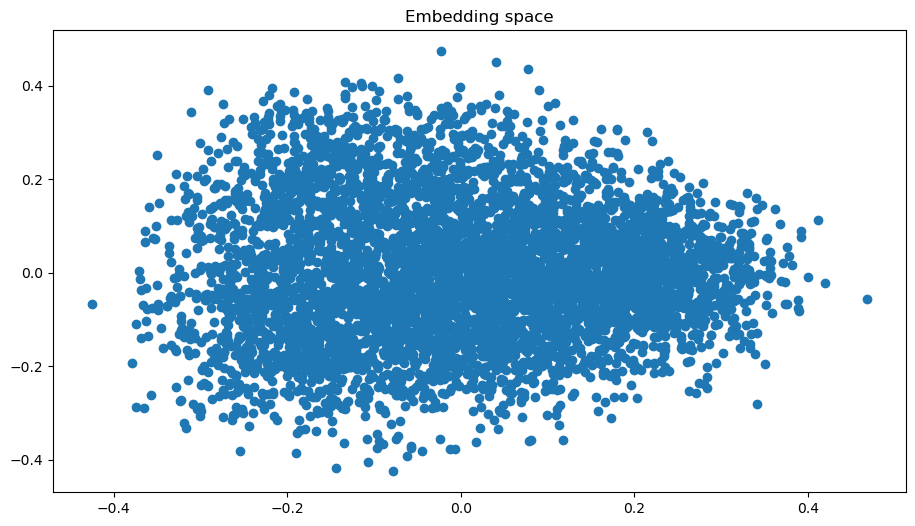

In [94]:
plt.figure(figsize=(11,6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:,1])
plt.show()

# Doing Algorithm

In [95]:
nn = NearestNeighbors(n_neighbors= 10)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=10)

# Recommended movies

In [96]:
def recommend(text):
    emb = embed([text])
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    neighbors = [idx for idx in neighbors if 0 <= idx < len(data)]
    return data['title'].iloc[neighbors].tolist()

In [97]:
print('Recommended Movies')
recommend('horror')

Recommended Movies


['Scary Movie 2',
 "Don't Let Them In",
 'Heavy Metal',
 'Friday the 13th: A New Beginning',
 'A Nightmare on Elm Street',
 "Freddy's Dead: The Final Nightmare",
 'New Nightmare',
 'The Amityville Horror',
 'The Field Guide to Evil',
 'Scary Movie']

In [68]:
df = pd.read_csv("E:\\CodSoft\\Task_4\\archive 1\\final_book_dataset_kaggle2.csv")

In [69]:
df.head

<bound method NDFrame.head of                                                  title  \
0    Data Analysis Using R (Low Priced Edition): A ...   
1    Head First Data Analysis: A learner's guide to...   
2    Guerrilla Data Analysis Using Microsoft Excel:...   
3    Python for Data Analysis: Data Wrangling with ...   
4    Excel Data Analysis For Dummies (For Dummies (...   
..                                                 ...   
825   Deep Learning: Engage the World Change the World   
826  Machine Learning in Finance: From Theory to Pr...   
827  Practical Deep Learning at Scale with MLflow: ...   
828  Clinical Biostatistics and Epidemiology Made R...   
829  AI and Machine Learning for Coders: A Programm...   

                                         author  price  \
0                           [ Dr Dhaval Maheta]   6.75   
1                                           NaN  33.72   
2            [ Oz du Soleil,  and , Bill Jelen]  32.07   
3                           [ William McK

In [70]:
df

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Deep Learning: Engage the World Change the World,"[ Michael Fullan, Joanne Quinn, et al.]",5.33,8.55 - 35.33,208,4.5,74,72%,14%,7%,2%,4%,7 x 0.47 x 10 inches,15.5 ounces,English,"Corwin; First edition (December 15, 2017)",59,/Deep-Learning-Engage-World-Change/dp/15063685...,https://www.amazon.com/Deep-Learning-Engage-Wo...
826,Machine Learning in Finance: From Theory to Pr...,"[ Matthew F. Dixon, Igor Halperin, et al.]",55.18,52.41 - 55.18,573,4.5,93,78%,7%,7%,4%,4%,6.14 x 1.25 x 9.21 inches,2.25 pounds,English,"Springer; 1st ed. 2020 edition (July 2, 2020)",,/Machine-Learning-Finance-Theory-Practice/dp/3...,https://www.amazon.com/Machine-Learning-Financ...
827,Practical Deep Learning at Scale with MLflow: ...,"[ Yong Liu, and , Dr. Matei Zaharia]",44.99,44.99,288,4.8,8,83%,17%,NaN,NaN,NaN,7.5 x 0.65 x 9.25 inches,1.1 pounds,English,"Packt Publishing (July 8, 2022)",978-1803241333,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
828,Clinical Biostatistics and Epidemiology Made R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Clinical-Biostatistics-Epidemiology-Ridiculou...,https://www.amazon.com/Clinical-Biostatistics-...


In [71]:
df = df[["title", "publisher", "avg_reviews"]]
df.head()

,title,publisher,avg_reviews
0,Data Analysis Using R (Low Priced Edition): A ...,"Notion Press Media Pvt Ltd (November 22, 2021)",4.4
1,Head First Data Analysis: A learner's guide to...,"O'Reilly Media; 1st edition (August 18, 2009)",4.3
2,Guerrilla Data Analysis Using Microsoft Excel:...,"Holy Macro! Books; Third edition (August 1, 2022)",4.7
3,Python for Data Analysis: Data Wrangling with ...,"O'Reilly Media; 2nd edition (November 14, 2017)",4.6
4,Excel Data Analysis For Dummies (For Dummies (...,"For Dummies; 5th edition (February 3, 2022)",3.9


In [65]:
df.shape

(830, 2)

In [76]:
pt = pd.DataFrame(df)


In [77]:


def recommend(title):
    index = np.where(pt.index == title)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
    
    for i in similar_items:
        similar_book_name = pt.index[i[0]]
        print(similar_book_name)


In [80]:
print(pt.index)

RangeIndex(start=0, stop=830, step=1)
